<a href="https://colab.research.google.com/github/Jin0331/TA/blob/master/DS_Lab_4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *5주차 실습*

- - -

### 1. 결측값 처리

* 함수의 속성 이용 -----> na.rm = T를 사용하여, 함수 사용시 NA를 제외하고 수행된다. *na.rm argument가 존재하는 함수는 제한적*

<br>

* is.na() -----> NA인 데이터가 있으면, **T(TRUE)** 아니라면 **F(FALSE)**

<br>

* na.omit() -----> NA인 데이터를 지운다. **주의** NA가 포함된 행 전체를 지운다...

<br>

In [ ]:
#install.packages("data.table")
library(data.table)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
## 실습데이터를 데이터프레임으로 로드!!!!!
DF <- fread("ftp://210.115.229.94/2020_datascience/6th_data/Pre_Season_Batter.csv", encoding = "UTF-8")
nrow(DF)

[1] 1393

In [ ]:
head(DF, 10)
# https://dacon.io/competitions/official/62540/data/

batter_id,batter_name,year,team,avg,G,AB,R,H,2B,⋯,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
0,가르시아,2018,LG,0.350,7,20,1,7,1,⋯,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),,0.959
1,강경학,2011,한화,0.000,4,2,2,0,0,⋯,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
1,강경학,2014,한화,-,4,0,2,0,0,⋯,0,NA,NA,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NA
1,강경학,2015,한화,0.130,10,23,3,3,0,⋯,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
1,강경학,2016,한화,0.188,14,32,4,6,1,⋯,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493
1,강경학,2017,한화,0.222,11,36,10,8,0,⋯,0,0.389,0.282,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.671
2,강구성,2013,NC,0.000,3,4,0,0,0,⋯,1,0.000,0.000,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),관산초-부천중-야탑고-NC-상무,9000만원,0.000
2,강구성,2016,NC,0.000,3,1,0,0,0,⋯,1,0.000,0.500,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),관산초-부천중-야탑고-NC-상무,9000만원,0.500
2,강구성,2017,NC,1.000,2,1,0,1,0,⋯,0,1.000,1.000,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),관산초-부천중-야탑고-NC-상무,9000만원,2.000


* table(is.na()) 를 이용한 결측값 확인

In [ ]:
table(is.na(airquality)) ## airquality는 R의 내장 데이터


FALSE  TRUE 
  874    44 

In [ ]:
# 우리가 받은 실습데이터(Pre_Seson_Battter) 확인해보자!
table(is.na(DF))


FALSE  TRUE 
40314    83 

In [ ]:
#DF$SLG ----> 장타율
print(table(is.na(DF$SLG)))

#DF$OBP ----> 출루율
print(table(is.na(DF$OBP)))

#DF$E ----> 실책
print(table(is.na(DF$E)))

#$DF$height/weight -- 키 / 몸무게!
print(table(is.na(DF$'height/weight')))


FALSE  TRUE 
 1364    29 

FALSE  TRUE 
 1368    25 

FALSE 
 1393 

FALSE 
 1393 


* 함수의 속성을 이용한 NA 제외 후 결과 출력

In [ ]:
# mean(평균)
mean(DF$SLG)  ## NA가 존재, 결과도 NA!
mean(DF$OBP)  ##         ""
mean(DF$E)    ##         ""
mean(DF$`height/weight`)  ## chr 형태

[1] NA

[1] NA

[1] 0.3819095

Warning message in mean.default(DF$`height/weight`):
“argument is not numeric or logical: returning NA”


[1] NA

In [ ]:
# mean에는 na.rm argument가 존재!!
mean(DF$SLG, na.rm = T)  ## NA가 존재, 결과도 NA!
mean(DF$OBP, na.rm = T)  ##         ""
mean(DF$E)    ##         ""
mean(DF$`height/weight`)  ## chr 형태

[1] 0.3610125

[1] 0.3179115

[1] 0.3819095

Warning message in mean.default(DF$`height/weight`):
“argument is not numeric or logical: returning NA”


[1] NA

In [ ]:
# sum(합계)
sum(DF$SLG)  ## NA가 존재, 결과도 NA!
sum(DF$OBP)  ##         ""
sum(DF$E)    ##         ""
sum(DF$`height/weight`)  ## chr 형태

[1] NA

[1] NA

[1] 532

ERROR: ignored

In [ ]:
# sum에도 na.rm argument가 존재!!
sum(DF$SLG, na.rm = T)  ## NA가 존재, 결과도 NA!
sum(DF$OBP, na.rm = T)  ##         ""
sum(DF$E)    ##         ""
sum(DF$`height/weight`)  ## chr 형태

[1] 492.421

[1] 434.903

[1] 532

ERROR: ignored

* is.na() -----> NA인 데이터가 있으면, T(TRUE) 아니라면 F(FALSE)

In [ ]:
is.na(DF$SLG)

[1] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

In [ ]:
!is.na(DF$SLG)

[1]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [37]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [61]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [73]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
  [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
  [97]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [109]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [121]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [133]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE
 [145]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [157]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [169]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
 [181]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
 [193]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [205]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [217]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [229]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [241]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [253]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [265]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
 [277]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [289]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [301]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
 [313]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [325]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [337]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [349] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [361]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [373]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [385]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [397]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [409]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [421]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [433]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [445]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [457]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE
 [469]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [481]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [493]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [505]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [517]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [529]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [541]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [553]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [565]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [577]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [589]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [601]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRU

In [ ]:
DF_not_NA_SLG <- DF[!is.na(DF$SLG), ]
nrow(DF_not_NA_SLG)

[1] 1364

In [ ]:
DF_not_NA_SLG <- DF[is.na(DF$SLG) == F, ]
nrow(DF_not_NA_SLG)

[1] 1364

In [ ]:
# 조건이 여러개라면???
# SLG가 NA가 아니고 OBP가 NA가 아닌것! (AND)
# SLG가 NA 또는 OBP가 NA가 아닌 것!(OR)

nrow(DF[!is.na(DF$SLG) & !is.na(DF$OBP), ])
nrow(DF[!is.na(DF$SLG) | !is.na(DF$OBP), ])

[1] 1364

[1] 1368

* na.omit() -----> NA인 데이터를 지운다. 주의 NA가 포함된 행 전체를 지운다...

In [ ]:
DF_na_omit <- na.omit(DF)
nrow(DF_na_omit)

mean(DF_na_omit$OBP)
mean(DF$OBP, na.rm = T)

[1] 1364

[1] 0.3159113

[1] 0.3179115

In [ ]:
head(DF, 10)

batter_id,batter_name,year,team,avg,G,AB,R,H,2B,⋯,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
0,가르시아,2018,LG,0.350,7,20,1,7,1,⋯,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),,0.959
1,강경학,2011,한화,0.000,4,2,2,0,0,⋯,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
1,강경학,2014,한화,-,4,0,2,0,0,⋯,0,NA,NA,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NA
1,강경학,2015,한화,0.130,10,23,3,3,0,⋯,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
1,강경학,2016,한화,0.188,14,32,4,6,1,⋯,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493
1,강경학,2017,한화,0.222,11,36,10,8,0,⋯,0,0.389,0.282,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.671
2,강구성,2013,NC,0.000,3,4,0,0,0,⋯,1,0.000,0.000,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),관산초-부천중-야탑고-NC-상무,9000만원,0.000
2,강구성,2016,NC,0.000,3,1,0,0,0,⋯,1,0.000,0.500,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),관산초-부천중-야탑고-NC-상무,9000만원,0.500
2,강구성,2017,NC,1.000,2,1,0,1,0,⋯,0,1.000,1.000,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),관산초-부천중-야탑고-NC-상무,9000만원,2.000


In [ ]:
# 결측값을 0으로 바꾸기.
DF$SLG <- ifelse(is.na(DF$SLG), -9, DF$SLG)

In [ ]:
head(DF, 10)

batter_id,batter_name,year,team,avg,G,AB,R,H,2B,⋯,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
0,가르시아,2018,LG,0.350,7,20,1,7,1,⋯,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),,0.959
1,강경학,2011,한화,0.000,4,2,2,0,0,⋯,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
1,강경학,2014,한화,-,4,0,2,0,0,⋯,0,-9.000,NA,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NA
1,강경학,2015,한화,0.130,10,23,3,3,0,⋯,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
1,강경학,2016,한화,0.188,14,32,4,6,1,⋯,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493
1,강경학,2017,한화,0.222,11,36,10,8,0,⋯,0,0.389,0.282,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.671
2,강구성,2013,NC,0.000,3,4,0,0,0,⋯,1,0.000,0.000,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),관산초-부천중-야탑고-NC-상무,9000만원,0.000
2,강구성,2016,NC,0.000,3,1,0,0,0,⋯,1,0.000,0.500,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),관산초-부천중-야탑고-NC-상무,9000만원,0.500
2,강구성,2017,NC,1.000,2,1,0,1,0,⋯,0,1.000,1.000,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),관산초-부천중-야탑고-NC-상무,9000만원,2.000



### 2. 이상값 처리

* 실제 상황에서는 이상값을 정의하기가 모호한 경우가 많다. 예를 들어, 어떤 사람의 나이가 120살이라고 입력이 되어 있다면 이것은 이상값이라고 할지, 정상값이라고 할지 명확히 판단하기 어렵다. !!

* 따라서 이상값을 정의하기가 모호하다면,,, 사분위수(quartiles)와 boxplot을 이용해서 이상값을 추론하자.!!

In [ ]:
head(DF, 5)

batter_id,batter_name,year,team,avg,G,AB,R,H,2B,⋯,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
0,가르시아,2018,LG,0.350,7,20,1,7,1,⋯,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),,0.959
1,강경학,2011,한화,0.000,4,2,2,0,0,⋯,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
1,강경학,2014,한화,-,4,0,2,0,0,⋯,0,-9.000,NA,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NA
1,강경학,2015,한화,0.130,10,23,3,3,0,⋯,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
1,강경학,2016,한화,0.188,14,32,4,6,1,⋯,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


In [ ]:
# 모든 열의 4분위수 구하기!!!!
summary(airquality)

     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56.00  
 1st Qu.: 18.00   1st Qu.:115.8   1st Qu.: 7.400   1st Qu.:72.00  
 Median : 31.50   Median :205.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.958   Mean   :77.88  
 3rd Qu.: 63.25   3rd Qu.:258.8   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
 NA's   :37       NA's   :7                                       
     Month            Day      
 Min.   :5.000   Min.   : 1.0  
 1st Qu.:6.000   1st Qu.: 8.0  
 Median :7.000   Median :16.0  
 Mean   :6.993   Mean   :15.8  
 3rd Qu.:8.000   3rd Qu.:23.0  
 Max.   :9.000   Max.   :31.0  
                               

In [ ]:
quar <- summary(airquality)
str(quar)

 'table' chr [1:7, 1:6] "Min.   :  1.00  " "1st Qu.: 18.00  " ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:7] "" "" "" "" ...
  ..$ : chr [1:6] "    Ozone" "   Solar.R" "     Wind" "     Temp" ...


In [ ]:
quar[, 1] # 첫 번째 열, Ozone

"Min.   :  1.00  " "1st Qu.: 18.00  " "Median : 31.50  " "Mean   : 42.13  " 
                                                         
"3rd Qu.: 63.25  " "Max.   :168.00  "     "NA's   :37  "

[,1]
[1,]   1.0
[2,]  18.0
[3,]  31.5
[4,]  63.5
[5,] 122.0
attr(,"class")
        1 
"integer"

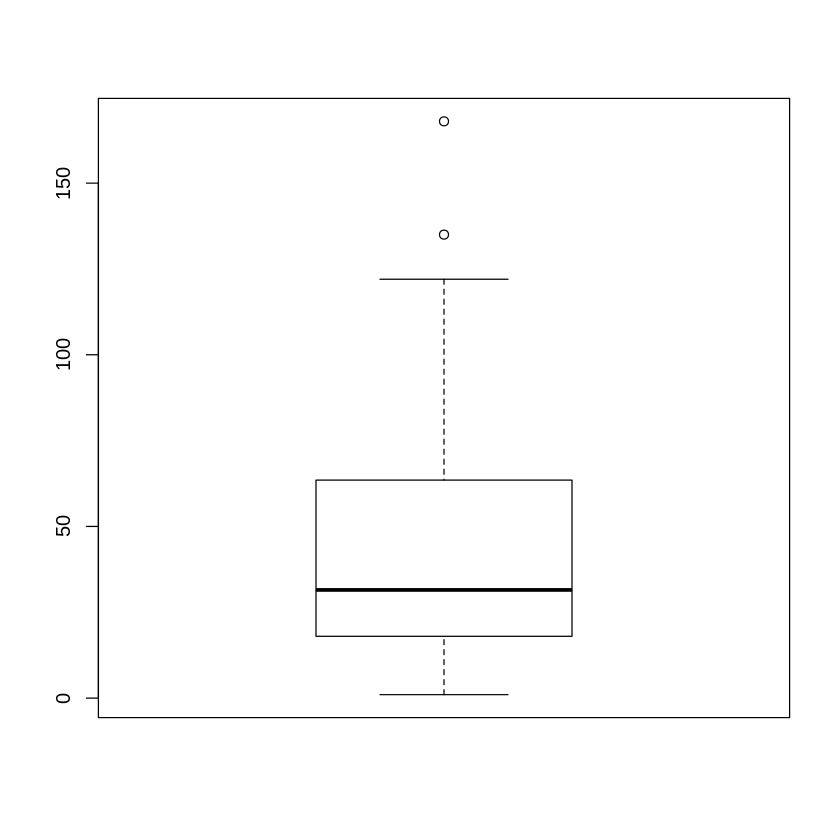

1.0,7,1.7,56
18.0,115,7.4,72
31.5,205,9.7,79
63.5,259,11.5,85
122.0,334,16.6,97


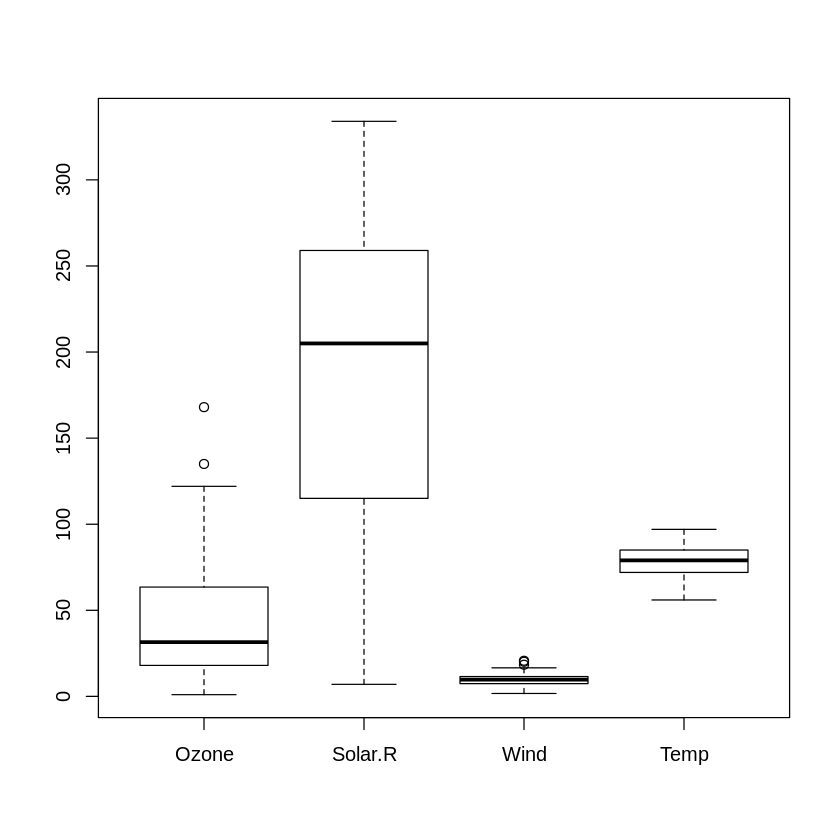

In [ ]:
# 또한, boxplot으로 그래프와 수치까지 확인할 수 있다
boxplot(airquality$Ozone)$stats ## 1개만 그린다면
boxplot(airquality[, c(1:4)])$stats

# min, 1사분위수, 중앙값, 3사분위수, 최대값(초과시 이상값 분류 가능)

In [ ]:
IQR(airquality$Ozone, na.rm = T)
IQR(airquality$Day)

[1] 45.25

[1] 15

####실습 데이터를 가지고 확인해보자!

In [ ]:
DF <- fread("ftp://210.115.229.94/2020_datascience/6th_data/Pre_Season_Batter.csv", encoding = "UTF-8")
summary(DF)

   batter_id     batter_name             year          team          
 Min.   :  0.0   Length:1393        Min.   :2002   Length:1393       
 1st Qu.: 99.0   Class :character   1st Qu.:2010   Class :character  
 Median :178.0   Mode  :character   Median :2014   Mode  :character  
 Mean   :173.4                      Mean   :2013                     
 3rd Qu.:254.0                      3rd Qu.:2017                     
 Max.   :344.0                      Max.   :2018                     
                                                                     
     avg                  G                 AB              R        
 Length:1393        Min.   :  1.000   Min.   :  0.0   Min.   : 0.00  
 Class :character   1st Qu.:  6.000   1st Qu.:  9.0   1st Qu.: 1.00  
 Mode  :character   Median :  9.000   Median : 18.0   Median : 2.00  
                    Mean   :  8.706   Mean   : 19.2   Mean   : 2.68  
                    3rd Qu.: 11.000   3rd Qu.: 28.0   3rd Qu.: 4.00  
                    

0.0000
0.2170
0.3445
0.4780
0.8640


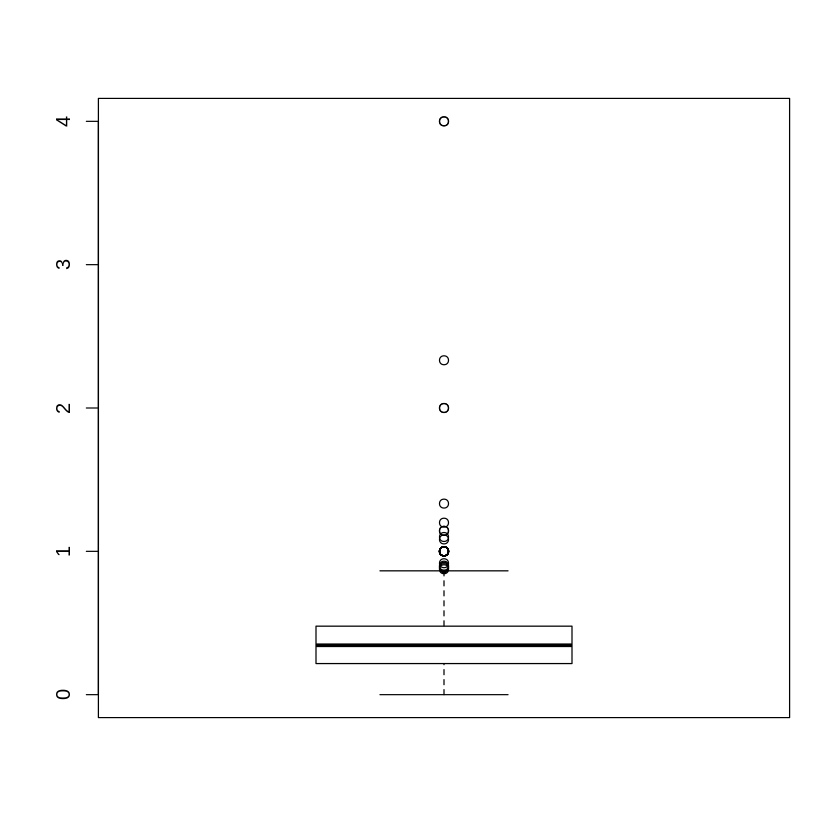

In [ ]:
boxplot(DF$SLG)$stats 

0.063
0.250
0.333
0.400
0.625


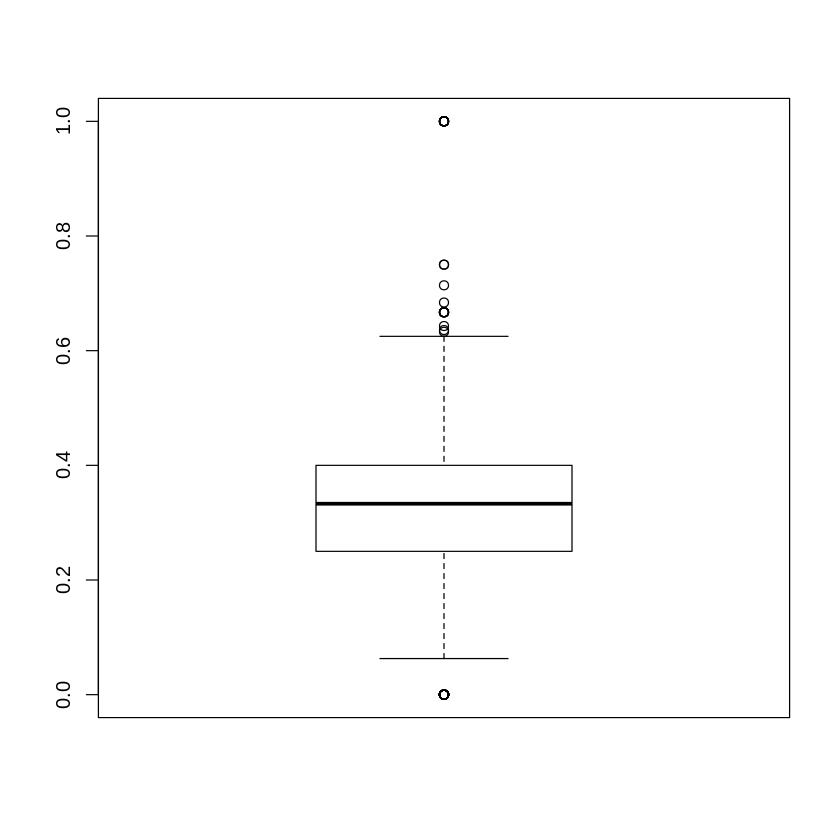

In [ ]:
boxplot(DF$OBP)$stats 

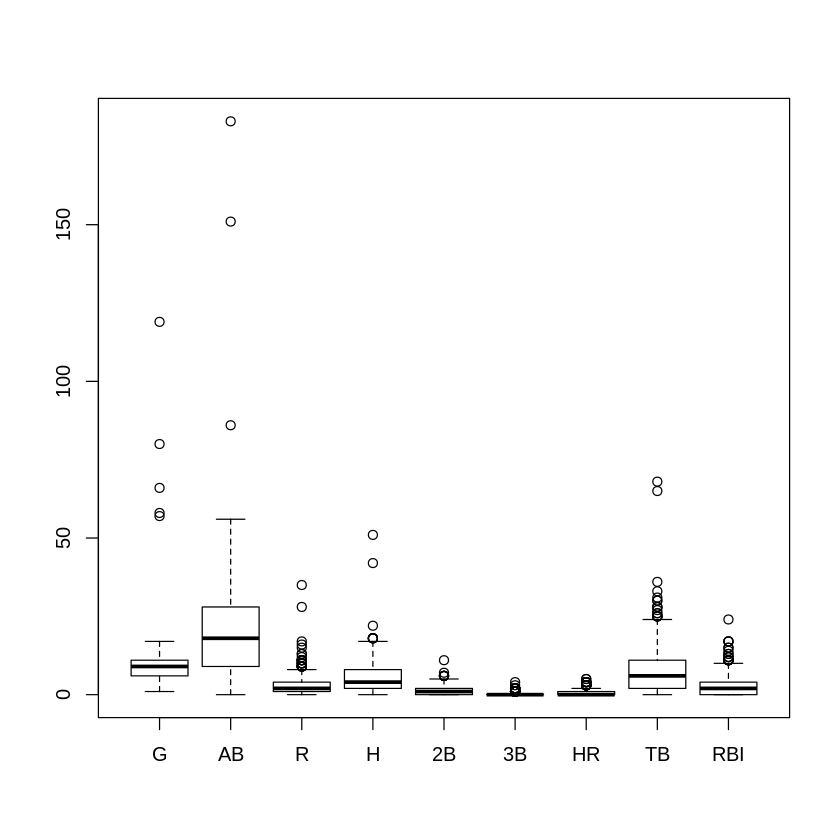

In [ ]:
boxplot(DF[, 6:14])

In [ ]:
## 모든 열의 IQR구하기!!
## IQR = Q3 - Q1
## 하지만 우리는 이미 존재하는 함수, IQR를 이용한다

IQRs <- function(DF){
  iqrs <- lapply(X = DF, function(col){
    return_value <- NULL
    if(class(col) != 'character'){
      return_value <- IQR(col, na.rm = T)
    } else {
      return_value <- -999
    }
    return(return_value)
  })
  return(iqrs)
}



What is lower and upper fence?

The Lower fence is the "lower limit" and the Upper fence is the "upper limit" of data, and any data lying outside this defined bounds can be considered an outlier.



```
LF = Q1 - 1.5 * IQR
UF = Q3 + 1.5 * IQR
```




In [ ]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.0     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [ ]:
IQRs(DF) %>% bind_cols()

batter_id,batter_name,year,team,avg,G,AB,R,H,2B,⋯,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
155,-999,7,-999,-999,5,19,3,6,2,⋯,1,0.276,0.15,1,-999,-999,-999,-999,-999,0.395
